# WS07: Improved Euler's methods

These exercises are indented to give you practice at using the material on numerical approximation and are intended to reinforce the material that was covered in lectures.

Please attempt the worksheet before your tutorial. Support is available in your tutorial or in the Class Team.

*[Partial solutions](./ws07_implemented) are available to check your understanding. Please create [Issues](https://gitlab.com/comp2421-numerical-computation/book/-/issues) and [Merge requests](https://gitlab.com/comp2421-numerical-computation/book/-/merge_requests) with your solutions or share your answers for peer feedback in the class team [Worksheet solutions channel](https://teams.microsoft.com/l/channel/19%3a43e9bb00fad04d8d8c85399b694657f4%40thread.tacv2/Worksheet%2520solutions?groupId=54035a7f-8376-45f0-b7b8-d4fac9d5ab54&tenantId=bdeaeda8-c81d-45ce-863e-5232a535b7cb)*

## Part a (pen and paper warm up)

### 1. Midpoint method

For a differential equation 

$$
u^\prime(t) = f(t,u),
$$

given a time step $\Delta t = t_1 - t_0$ and $u(t_0)=u_0$, $u(t_1)=u_1$ may be computed by

- the Euler's formula

  $$
  \frac{u_1-u_0}{\Delta t} = f(t_0,u_0)
  $$

- or the midpoint formula

  $$
  \frac{u_1-u_0}{\Delta t} = f(t_{1/2},u_{1/2}),
  $$
  
  where 
  
  $$
  t_{1/2} = \frac{t_0+t_1}{2} 
  $$
  
  and $u_{1/2}$ 

  $$
  u_{1/2} = u_0 + \frac{\Delta t}{2} f(t_0,u_0),
  $$

  which is computed by the Euler's formula on a half-time step of $\frac{\Delta t}{2}$.


Both formulas are approximations of the original differential equation. However, the midpoint formula has one more step to compute a midpoint $(t_{1/2}, u_{1/2})$, which is more accurate. Apply the midpoint formula to the same problem considered in WS06:

$$
d^\prime(t) = t^2 -3t + d
$$

with $\Delta t = 0.01$, and $d(0) =1$. Use the midpoint method to compute $d(0.01)$. 

## Part b (code implementations and testing)

### 2. Implement the midpoint method

In [3]:
import numpy as np

In [8]:
def midpoint_method(d0, dt, n):
    '''
    Input:    initial value d0, time setp dt, and total computational steps n
    Output:   array d(n+1) with d[0] = d0, d[1] = d(0.01), d[2]=d(0.01) ... d[100] = d(1.00)
    '''
    d = np.zeros(n+1)
    d[0] = d0

    t = np.zeros(n+1)
    for i in range(n+1):
        t[i] = i*dt
    
    '''
    Add a loop to compute d[1] to d[100] using midpoint method
    '''
    for i in range(n):
        d_mid = d[i] + 0.5 * dt * f(t[i], d[i])
        t_mid = t[i] + 0.5 * dt
        d[i+1] = d[i] + dt * f(t_mid, d_mid)
        t[i+1] = t[i] + dt
                                       
    return t, d

def Euler_method(d0, dt, n):
    '''
    Input:    initial value d0, time setp dt, and total computational steps n
    Output:   array d(n+1) with d[0] = d0, d[1] = d(0.01), d[2]=d(0.01) ... d[100] = d(1.00)
    '''
    d = np.zeros(n+1)
    d[0] = d0

    t = np.zeros(n+1)
    for i in range(n+1):
        t[i] = i*dt
    
    '''
    Add a loop to compute d[1] to d[100] using Euler's method
    '''
    for i in range(n):
        #using S(t + dt) = S(t) + dt(*function of S'(t)*)
        d[i+1] = d[i] + dt*(f(t[i], d[i]))
                                       
    return t, d

### 3. Test your implementation

Use the example in Q4 to test your implementation and compare with the exact solution: $d(t) = -t^2 +t +1$

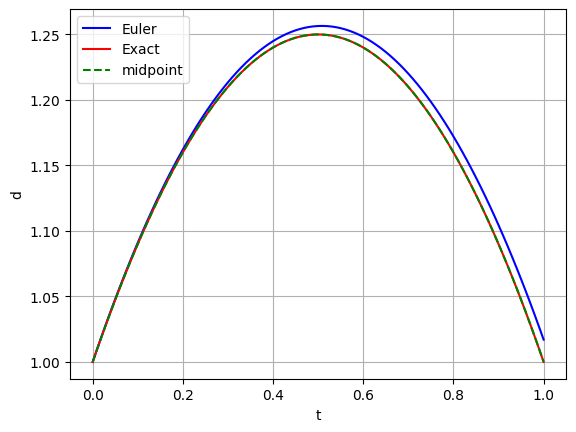

In [9]:
def f(t, d):
    return t*t - 3.0*t + d

def d_exact(t):
    return -t*t + t + 1.0


d0 = float(1.0)
dt = float(0.01)
n = int(100)

t, d_Euler = Euler_method(d0, dt, n)
t, d_midpoint = midpoint_method(d0, dt, n)

de = np.zeros(n+1)
for i in range(n+1):
    de[i] = d_exact(t[i])
    

import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(t, d_Euler, "-b", label="Euler")
plt.plot(t, de, "-r", label="Exact")
plt.plot(t, d_midpoint, "--g", label="midpoint")
plt.legend(loc="upper left")
plt.xlabel("t")
plt.ylabel("d")
plt.grid()
plt.show()


### 4. Test a larger time step: dt=0.1, n=10

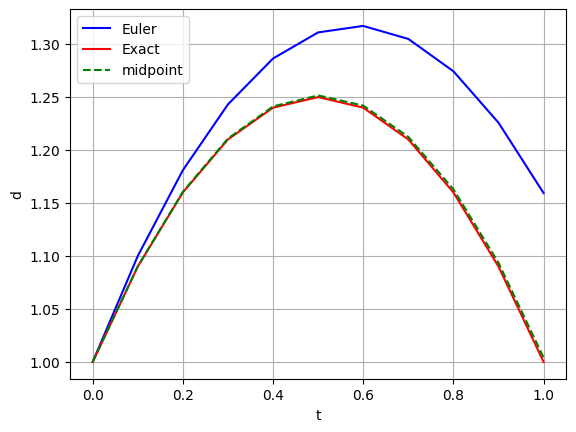

In [10]:
def f(t, d):
    return t*t - 3.0*t + d

def d_exact(t):
    return -t*t + t + 1.0


d0 = float(1.0)
dt = float(0.1)
n = int(10)

t, d_Euler = Euler_method(d0, dt, n)
t, d_midpoint = midpoint_method(d0, dt, n)

de = np.zeros(n+1)
for i in range(n+1):
    de[i] = d_exact(t[i])
    

import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(t, d_Euler, "-b", label="Euler")
plt.plot(t, de, "-r", label="Exact")
plt.plot(t, d_midpoint, "--g", label="midpoint")
plt.legend(loc="upper left")
plt.xlabel("t")
plt.ylabel("d")
plt.grid()
plt.show()


## Part c: Extension
Apply your Python code of Euler's method to equation

$$
d^\prime(t) = 2 \sqrt d  \quad \text{starting from} \quad d(0)=0.
$$

The exact solution is $d(t) = t^2$.

- Check whether your code will fail.
- Explain why it fails and how you can avoid this?